<a href="https://colab.research.google.com/github/nishitmv/ML/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

df = pd.read_csv("/content/sample_data/Classification_train.csv")

# Remove rows with label 3 - Its not required
df = df[df['Label'] != 3]

#df = df.sample(n=1000, random_state=42).reset_index(drop=True)

features = df.drop(columns=["Date", "Time", "Label"]).values.astype('float32')
labels = df["Label"].values.astype('int')

features_tensor = torch.tensor(features)
labels_tensor = torch.tensor(labels)


features_train, features_test, labels_train, labels_test = train_test_split(features_tensor, labels_tensor, test_size=0.2, random_state=42)
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

features_train_scaled = torch.tensor(features_train_scaled).to(torch.float32)
features_test_scaled = torch.tensor(features_test_scaled).to(torch.float32)

train_features_dataloader = DataLoader(features_train_scaled, shuffle=False)
labels_train_dataloader = DataLoader(labels_train,  shuffle=False)
test_features_dataloader = DataLoader(features_test_scaled, shuffle=False)
labels_test_dataloader = DataLoader(labels_test,  shuffle=False)

print(labels_train_dataloader)
print(train_features_dataloader)
#

cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64, 2)
        )

def forward(self, x):
        x = self.flatten(x)
        logits = model(x)
        return logits

epochs=5
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 counter = 0
 size = len(train_features_dataloader.dataset)
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):
  counter+=1
  output = model(feature)
  loss = loss_func(output, label)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if(counter % 500 == 0):
    loss, current = loss.item(), counter * len(feature)
    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

torch.save(model, '3layersdropout.pth')

torch.Size([7080, 56])
loss: 0.198012  [  500/ 5664]
loss: 0.008141  [ 1000/ 5664]
loss: 0.011414  [ 1500/ 5664]
loss: 0.000012  [ 2000/ 5664]
loss: 0.003216  [ 2500/ 5664]
loss: 0.000000  [ 3000/ 5664]
loss: 0.020251  [ 3500/ 5664]
loss: 0.000000  [ 4000/ 5664]
loss: 0.000000  [ 4500/ 5664]
loss: 0.000000  [ 5000/ 5664]
loss: 0.000000  [ 5500/ 5664]
loss: 0.013681  [  500/ 5664]
loss: 0.000001  [ 1000/ 5664]
loss: 0.001263  [ 1500/ 5664]
loss: 0.000001  [ 2000/ 5664]
loss: 0.000106  [ 2500/ 5664]
loss: 0.000000  [ 3000/ 5664]
loss: 0.000525  [ 3500/ 5664]
loss: 0.000000  [ 4000/ 5664]
loss: 0.000000  [ 4500/ 5664]
loss: 0.000000  [ 5000/ 5664]
loss: 0.000000  [ 5500/ 5664]
loss: 0.092304  [  500/ 5664]
loss: 0.000002  [ 1000/ 5664]
loss: 0.000636  [ 1500/ 5664]
loss: 0.000008  [ 2000/ 5664]
loss: 0.007296  [ 2500/ 5664]
loss: 0.000000  [ 3000/ 5664]
loss: 0.000129  [ 3500/ 5664]
loss: 0.000000  [ 4000/ 5664]
loss: 0.000000  [ 4500/ 5664]
loss: 0.000000  [ 5000/ 5664]
loss: 0.000000  [

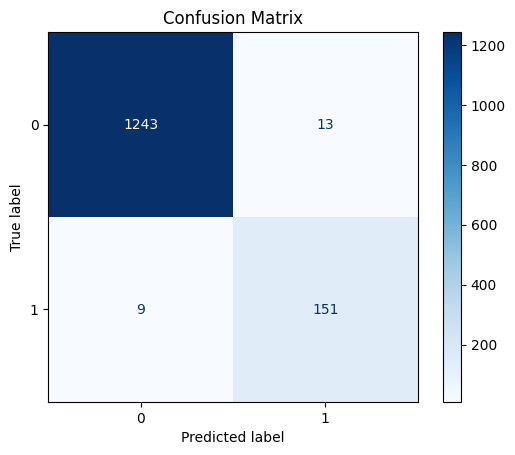

1394
1416
Test Accuracy: 98.45%
Precision: 0.92
Recall:    0.94
F1 Score:  0.93


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
model = torch.load('3layersdropout.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print("Correct ", correct)
  print("Total ", total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

SGD

In [ ]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

epochs=20
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")
torch.save(model, '4layersSGD.pth')


torch.Size([7080, 56])
Epoch 1/20, Loss: 0.00021789084712509066
Epoch 2/20, Loss: 8.940656698541716e-06
Epoch 3/20, Loss: 2.0265558760002023e-06
Epoch 4/20, Loss: 5.960462772236497e-07
Epoch 5/20, Loss: 2.3841855067985307e-07
Epoch 6/20, Loss: 1.1920928244535389e-07
Epoch 7/20, Loss: 1.1920928244535389e-07
Epoch 8/20, Loss: 0.0
Epoch 9/20, Loss: 0.0
Epoch 10/20, Loss: 0.0
Epoch 11/20, Loss: 0.0
Epoch 12/20, Loss: 0.0
Epoch 13/20, Loss: 0.0
Epoch 14/20, Loss: 0.0
Epoch 15/20, Loss: 0.0
Epoch 16/20, Loss: 0.0
Epoch 17/20, Loss: 0.0
Epoch 18/20, Loss: 0.0
Epoch 19/20, Loss: 0.0
Epoch 20/20, Loss: 0.0


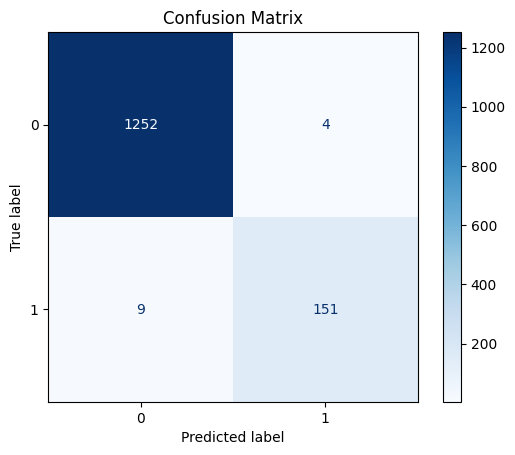

1403
1416
Test Accuracy: 99.08%
Precision: 0.97
Recall:    0.94
F1 Score:  0.96


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
model = torch.load('4layersSGD.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

In [ ]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64, 2)
        )

epochs=20
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")
torch.save(model, '4layersdropout.pth')


torch.Size([7080, 56])
Epoch 1/20, Loss: 0.0
Epoch 2/20, Loss: 0.0
Epoch 3/20, Loss: 0.0
Epoch 4/20, Loss: 0.0
Epoch 5/20, Loss: 0.0
Epoch 6/20, Loss: 0.0
Epoch 7/20, Loss: 0.0
Epoch 8/20, Loss: 0.0
Epoch 9/20, Loss: 0.0
Epoch 10/20, Loss: 0.0
Epoch 11/20, Loss: 0.0
Epoch 12/20, Loss: 0.0
Epoch 13/20, Loss: 0.0
Epoch 14/20, Loss: 0.0
Epoch 15/20, Loss: 0.0
Epoch 16/20, Loss: 0.0
Epoch 17/20, Loss: 0.0
Epoch 18/20, Loss: 0.0
Epoch 19/20, Loss: 0.0
Epoch 20/20, Loss: 0.0


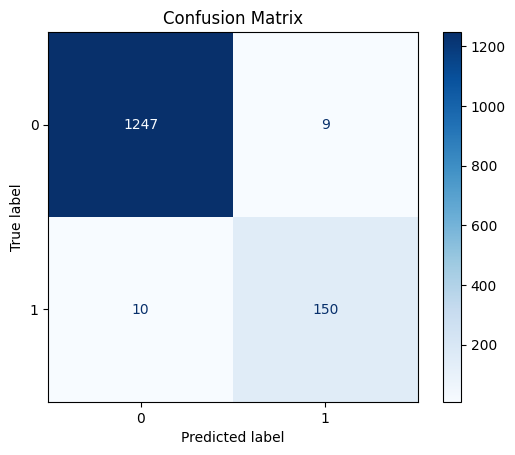

1397
1416
Test Accuracy: 98.66%
Precision: 0.94
Recall:    0.94
F1 Score:  0.94


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
model = torch.load('4layersdropout.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

More layers!

In [ ]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64, 2)
        )

epochs=10
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")
torch.save(model, '5layersdropout.pth')

torch.Size([7080, 56])
Epoch 1/10, Loss: 0.0
Epoch 2/10, Loss: 0.0
Epoch 3/10, Loss: 0.0
Epoch 4/10, Loss: 0.0
Epoch 5/10, Loss: 0.0
Epoch 6/10, Loss: 0.0
Epoch 7/10, Loss: 0.0
Epoch 8/10, Loss: 0.0
Epoch 9/10, Loss: 0.0
Epoch 10/10, Loss: 0.0


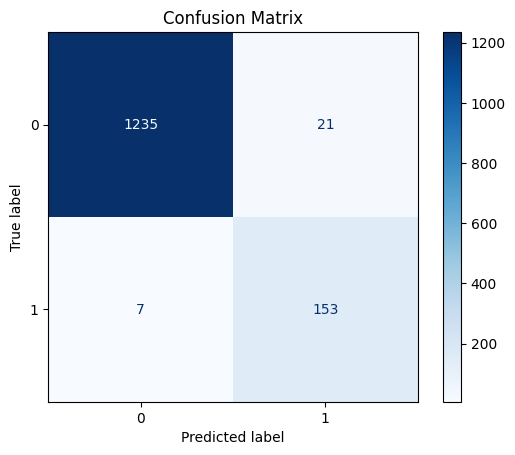

1388
1416
Test Accuracy: 98.02%
Precision: 0.88
Recall:    0.96
F1 Score:  0.92


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
model = torch.load('5layersdropout.pth', weights_only=False)
model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

In [ ]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 2)
        )

epochs=10
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label)
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

torch.save(model, '3layersTanH.pth')

torch.Size([7080, 56])
Epoch 1/10, Loss: 0.0001958416833076626
Epoch 2/10, Loss: 0.0004318020073696971
Epoch 3/10, Loss: 0.0007524043321609497
Epoch 4/10, Loss: 0.0010178867960348725
Epoch 5/10, Loss: 0.0010277710389345884
Epoch 6/10, Loss: 0.0006506709614768624
Epoch 7/10, Loss: 0.0006968930247239769
Epoch 8/10, Loss: 0.00047886825632303953
Epoch 9/10, Loss: 0.00038092033355496824
Epoch 10/10, Loss: 0.00024673278676345944


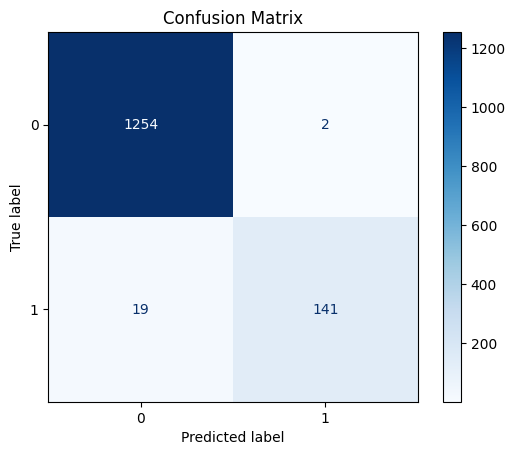

1395
1416
Test Accuracy: 98.52%
Precision: 0.99
Recall:    0.88
F1 Score:  0.93


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
model = torch.load('3layersTanH.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

In [ ]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 64),
            nn.Sigmoid(),
            nn.Linear(64, 64),
            nn.Sigmoid(),
            nn.Linear(64, 2)
        )

epochs=10
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label)
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

torch.save(model, '3layersSigmoid.pth')

torch.Size([7080, 56])
Epoch 1/10, Loss: 1.3708974620385561e-05
Epoch 2/10, Loss: 9.894321920000948e-06
Epoch 3/10, Loss: 9.417489309271332e-06
Epoch 4/10, Loss: 1.645074735279195e-05
Epoch 5/10, Loss: 2.5152843591058627e-05
Epoch 6/10, Loss: 3.0040289857424796e-05
Epoch 7/10, Loss: 3.683499380713329e-05
Epoch 8/10, Loss: 4.51792984677013e-05
Epoch 9/10, Loss: 5.8887653722194955e-05
Epoch 10/10, Loss: 7.045020902296528e-05


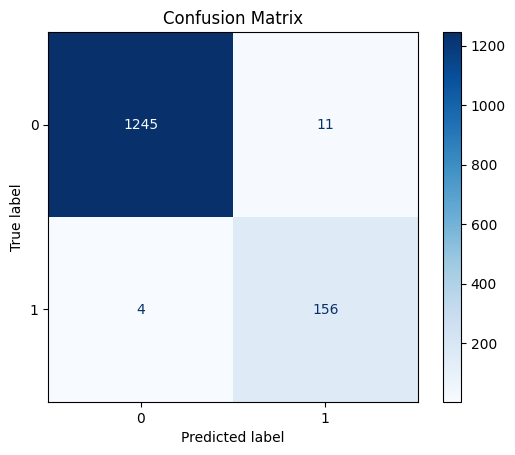

1401
1416
Test Accuracy: 98.94%
Precision: 0.93
Recall:    0.97
F1 Score:  0.95


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
model = torch.load('3layersSigmoid.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

EVALUATE WITH TEST DATA

cuda


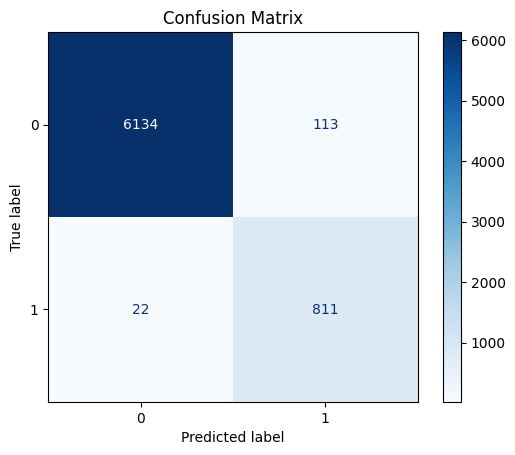

6945
7080
Test Accuracy: 98.09%
Precision: 0.88
Recall:    0.97
F1 Score:  0.92


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

df = pd.read_csv("/content/ClassificationModels/test_classification.csv")

# Remove rows with label 3 - Its not required
df = df[df['Label'] != 3]

#df = df.sample(n=1000, random_state=42).reset_index(drop=True)
scaler = StandardScaler()
features = df.drop(columns=["Date", "Time", "Label"])
scaled_features = scaler.fit_transform(features)


labels = df["Label"].values.astype('int')

features_test = torch.tensor(scaled_features)
labels_test = torch.tensor(labels)

features_test_scaled = torch.tensor(scaled_features).to(torch.float32)
test_features_dataloader = DataLoader(features_test_scaled, shuffle=False)
labels_test_dataloader = DataLoader(labels_test,  shuffle=False)


#ClassificationModels/5layersdropout.pth
#ClassificationModels/4layersSGD.pth
#ClassificationModels/4layersdropout.pth
#ClassificationModels/3layersTanH.pth
#ClassificationModels/3layersSigmoid.pth
#ClassificationModels/3layersdropout.pth

model = torch.load('/content/ClassificationModels/5layersdropout.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

cuda


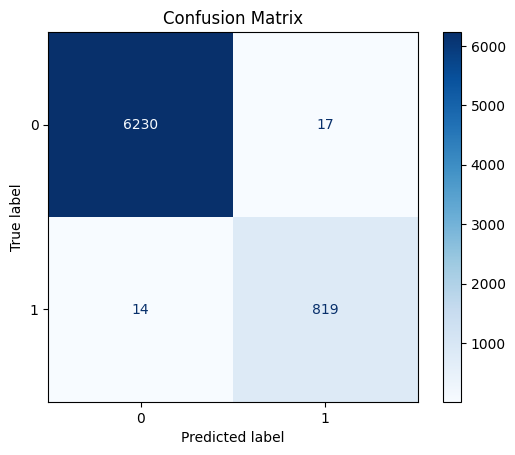

7049
7080
Test Accuracy: 99.56%
Precision: 0.98
Recall:    0.98
F1 Score:  0.98


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

df = pd.read_csv("/content/ClassificationModels/test_classification.csv")

# Remove rows with label 3 - Its not required
df = df[df['Label'] != 3]

#df = df.sample(n=1000, random_state=42).reset_index(drop=True)
scaler = StandardScaler()
features = df.drop(columns=["Date", "Time", "Label"])
scaled_features = scaler.fit_transform(features)


labels = df["Label"].values.astype('int')

features_test = torch.tensor(scaled_features)
labels_test = torch.tensor(labels)

features_test_scaled = torch.tensor(scaled_features).to(torch.float32)
test_features_dataloader = DataLoader(features_test_scaled, shuffle=False)
labels_test_dataloader = DataLoader(labels_test,  shuffle=False)


#ClassificationModels/5layersdropout.pth
#ClassificationModels/4layersSGD.pth
#ClassificationModels/4layersdropout.pth
#ClassificationModels/3layersTanH.pth
#ClassificationModels/3layersSigmoid.pth
#ClassificationModels/3layersdropout.pth

model = torch.load('/content/ClassificationModels/4layersSGD.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

cuda


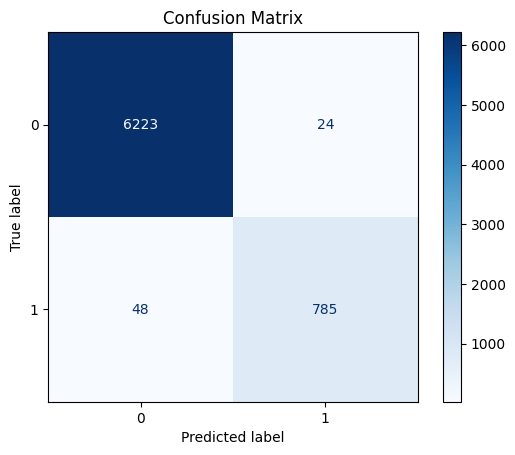

7008
7080
Test Accuracy: 98.98%
Precision: 0.97
Recall:    0.94
F1 Score:  0.96


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

df = pd.read_csv("/content/ClassificationModels/test_classification.csv")

# Remove rows with label 3 - Its not required
df = df[df['Label'] != 3]

#df = df.sample(n=1000, random_state=42).reset_index(drop=True)
scaler = StandardScaler()
features = df.drop(columns=["Date", "Time", "Label"])
scaled_features = scaler.fit_transform(features)


labels = df["Label"].values.astype('int')

features_test = torch.tensor(scaled_features)
labels_test = torch.tensor(labels)

features_test_scaled = torch.tensor(scaled_features).to(torch.float32)
test_features_dataloader = DataLoader(features_test_scaled, shuffle=False)
labels_test_dataloader = DataLoader(labels_test,  shuffle=False)


#ClassificationModels/5layersdropout.pth
#ClassificationModels/4layersSGD.pth
#ClassificationModels/4layersdropout.pth
#ClassificationModels/3layersTanH.pth
#ClassificationModels/3layersSigmoid.pth
#ClassificationModels/3layersdropout.pth

model = torch.load('/content/ClassificationModels/4layersdropout.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

cuda


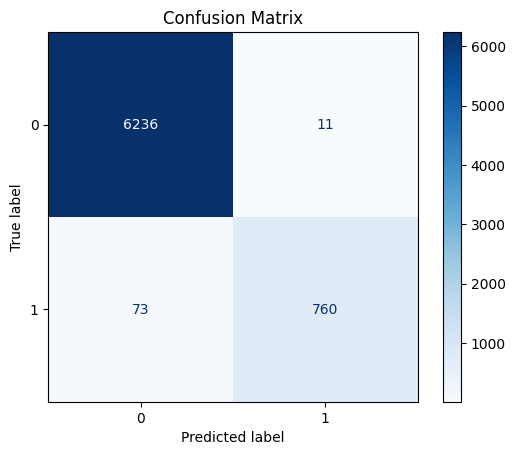

6996
7080
Test Accuracy: 98.81%
Precision: 0.99
Recall:    0.91
F1 Score:  0.95


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

df = pd.read_csv("/content/ClassificationModels/test_classification.csv")

# Remove rows with label 3 - Its not required
df = df[df['Label'] != 3]

#df = df.sample(n=1000, random_state=42).reset_index(drop=True)
scaler = StandardScaler()
features = df.drop(columns=["Date", "Time", "Label"])
scaled_features = scaler.fit_transform(features)


labels = df["Label"].values.astype('int')

features_test = torch.tensor(scaled_features)
labels_test = torch.tensor(labels)

features_test_scaled = torch.tensor(scaled_features).to(torch.float32)
test_features_dataloader = DataLoader(features_test_scaled, shuffle=False)
labels_test_dataloader = DataLoader(labels_test,  shuffle=False)


#ClassificationModels/5layersdropout.pth
#ClassificationModels/4layersSGD.pth
#ClassificationModels/4layersdropout.pth
#ClassificationModels/3layersTanH.pth
#ClassificationModels/3layersSigmoid.pth
#ClassificationModels/3layersdropout.pth

model = torch.load('/content/ClassificationModels/3layersTanH.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

cuda


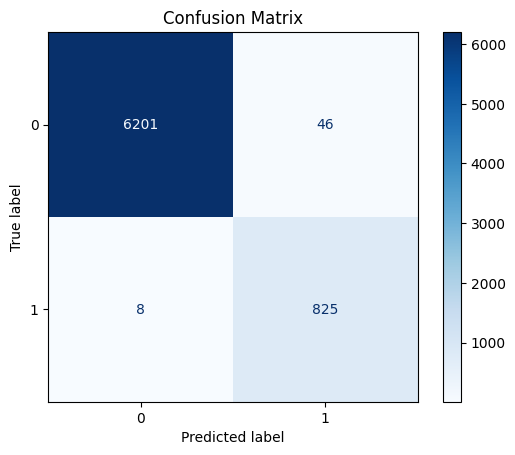

7026
7080
Test Accuracy: 99.24%
Precision: 0.95
Recall:    0.99
F1 Score:  0.97


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

df = pd.read_csv("/content/ClassificationModels/test_classification.csv")

# Remove rows with label 3 - Its not required
df = df[df['Label'] != 3]

#df = df.sample(n=1000, random_state=42).reset_index(drop=True)
scaler = StandardScaler()
features = df.drop(columns=["Date", "Time", "Label"])
scaled_features = scaler.fit_transform(features)


labels = df["Label"].values.astype('int')

features_test = torch.tensor(scaled_features)
labels_test = torch.tensor(labels)

features_test_scaled = torch.tensor(scaled_features).to(torch.float32)
test_features_dataloader = DataLoader(features_test_scaled, shuffle=False)
labels_test_dataloader = DataLoader(labels_test,  shuffle=False)


#ClassificationModels/5layersdropout.pth
#ClassificationModels/4layersSGD.pth
#ClassificationModels/4layersdropout.pth
#ClassificationModels/3layersTanH.pth
#ClassificationModels/3layersSigmoid.pth
#ClassificationModels/3layersdropout.pth

model = torch.load('/content/ClassificationModels/3layersSigmoid.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")

cuda


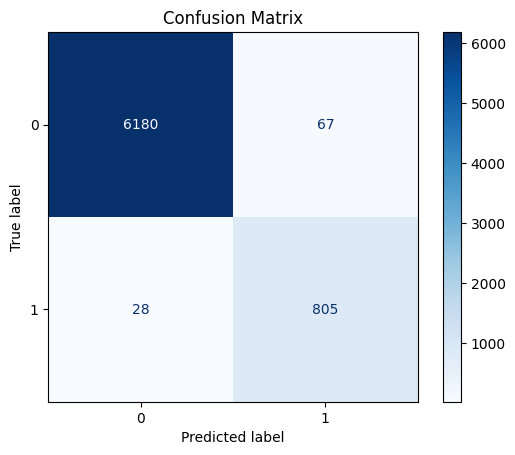

6985
7080
Test Accuracy: 98.66%
Precision: 0.92
Recall:    0.97
F1 Score:  0.94


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

df = pd.read_csv("/content/ClassificationModels/test_classification.csv")

# Remove rows with label 3 - Its not required
df = df[df['Label'] != 3]

#df = df.sample(n=1000, random_state=42).reset_index(drop=True)
scaler = StandardScaler()
features = df.drop(columns=["Date", "Time", "Label"])
scaled_features = scaler.fit_transform(features)


labels = df["Label"].values.astype('int')

features_test = torch.tensor(scaled_features)
labels_test = torch.tensor(labels)

features_test_scaled = torch.tensor(scaled_features).to(torch.float32)
test_features_dataloader = DataLoader(features_test_scaled, shuffle=False)
labels_test_dataloader = DataLoader(labels_test,  shuffle=False)


#ClassificationModels/5layersdropout.pth
#ClassificationModels/4layersSGD.pth
#ClassificationModels/4layersdropout.pth
#ClassificationModels/3layersTanH.pth
#ClassificationModels/3layersSigmoid.pth
#ClassificationModels/3layersdropout.pth

model = torch.load('/content/ClassificationModels/3layersdropout.pth', weights_only=False)

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
  precision = precision_score(all_labels, all_predictions, average='binary')
  recall = recall_score(all_labels, all_predictions, average='binary')
  f1 = f1_score(all_labels, all_predictions, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")